# EDA - Black Friday Sales Analysis

The dataset is taken from Kaggle

With the available data, I will try to find the answers to the following questions

1. What all are the products, that have been purchased the most?
2. Which product category has been sold the maximum?
3. Men or Women, who are likely to spend more in Black Friday Sales?
4. Married or Individuals, who spends more?
5. Which age group has more interest in these type of sales?

In [2]:
# importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the data

df = pd.read_csv("BlackFriday.csv")

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


#### The data contains 537577 rows(observations) and 12 columns( features)

In [6]:
df["Age"].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


## 1. Data Analysis

#### Let us check the null- values in the data set

In [9]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [10]:
df["Product_Category_1"].value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

In [11]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


<AxesSubplot:>

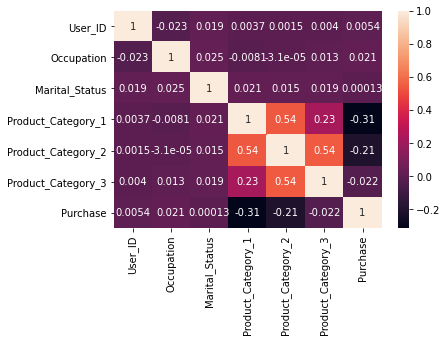

In [12]:
sns.heatmap(df.corr(), annot = True)

#### We can See that the co-relation factor among Product_Category_1, Product_Category_2 and Product_Category_3 is greater than 0.5, which is moderate cor-relation

In [13]:
df_copy = df.copy()

In [14]:
df_copy = df_copy.dropna()

In [15]:
df_copy.shape

(164278, 12)

In [16]:
df.shape

(537577, 12)

In [17]:
(537577-164278)/537577

0.6944102891306734

#### We can See that about 70 % of observations has been dropeed if we remove the null values from the dataset. This results in biased model causing under-fitting 

#### The available alternate approaches are imputing the missing values with mean, mode or fill with 0. Since the Product_Catgeory_2 & Product_Catgeory_3 coulmns are interlinked with values present in Product_Catgeory_1, hence imputing with mean/mode is not a good strategy, hence we will fill the Nan values with 0.

In [18]:
df.fillna(0,inplace = True)

In [19]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Q1) What are the products that have been purchased the most?

In [20]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [21]:
df1 = df["Product_ID"].value_counts()[0:10]

print(df1)

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00145042    1384
P00059442    1384
Name: Product_ID, dtype: int64


<AxesSubplot:>

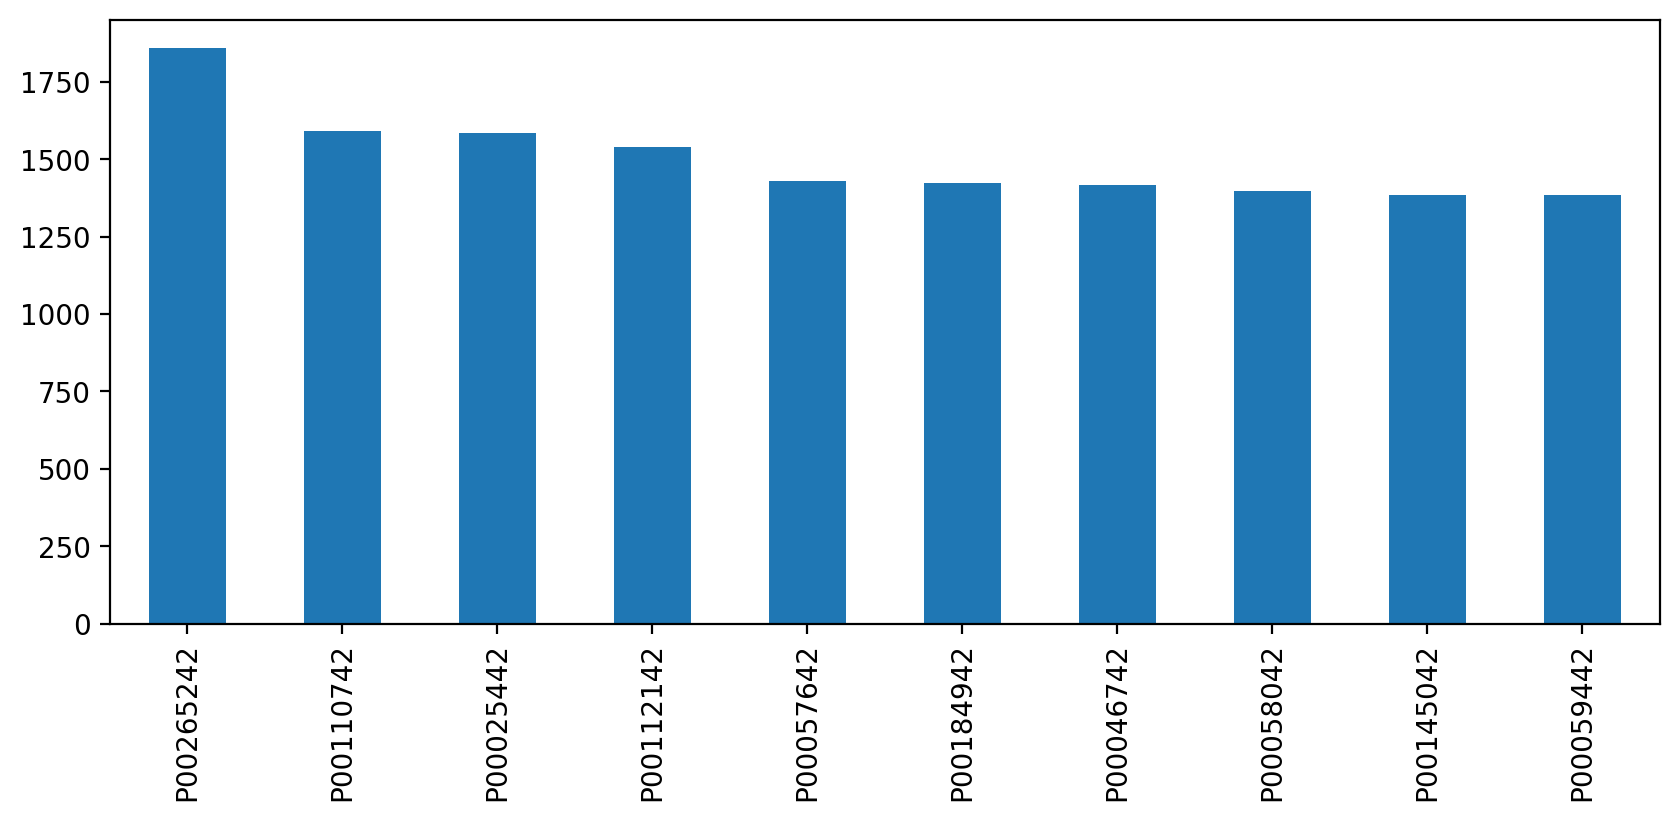

In [22]:
plt.figure(figsize=(10,4),dpi=200)
df1.plot(kind = "bar")

 Here, we can see that top 10 products are sold more than 1300 in quantity.

### Q2) Which are the product category that have been purchased the most?

In [23]:
df2 = df["Product_Category_1"].value_counts()[0:10]

print(df2)

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
Name: Product_Category_1, dtype: int64


<AxesSubplot:>

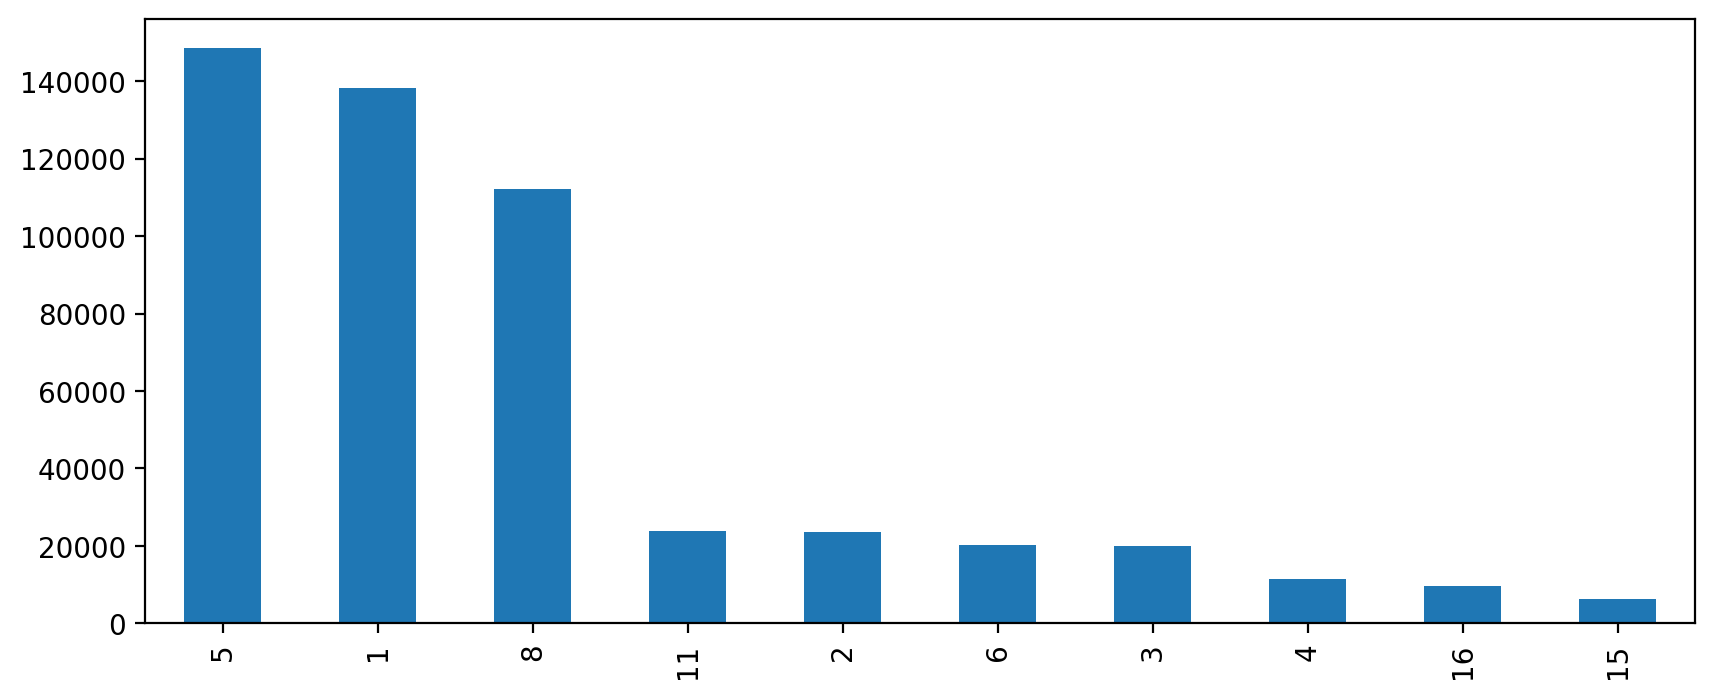

In [24]:
plt.figure(figsize=(10,4),dpi=200)
df2.plot(kind = "bar")

Here, we can see that product_category_1 = 5 has been sold the maximum number.

### Q) Which Gender spent more in Black Friday Sales?

<AxesSubplot:xlabel='Gender', ylabel='count'>

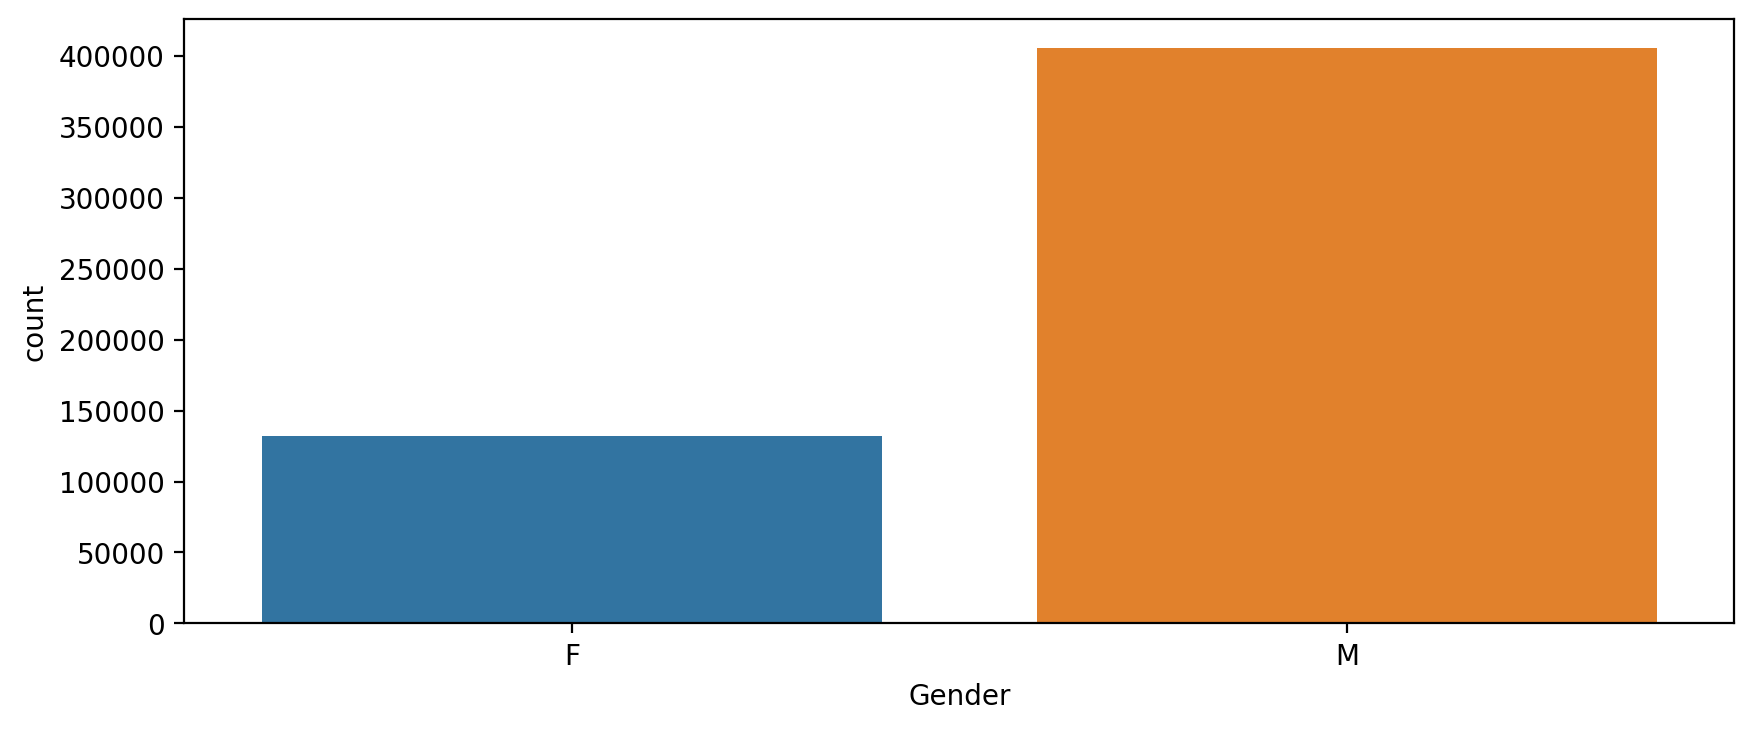

In [25]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='Gender',data=df)

In [26]:
df["Gender"].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

The plot show that men spent a lot in the black friday sales.

In [27]:
df["Marital_Status"].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

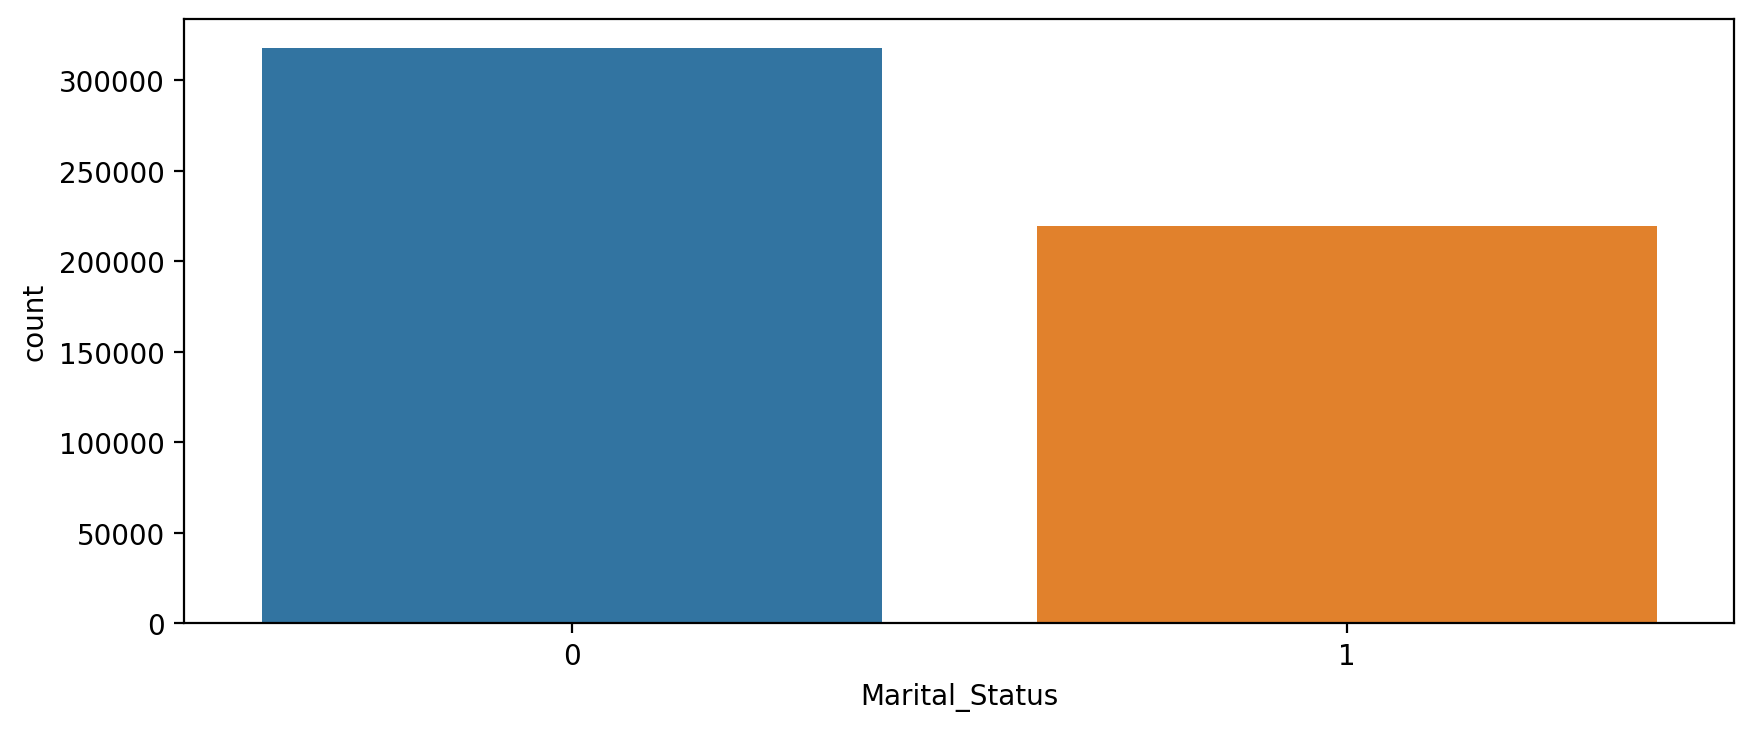

In [28]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='Marital_Status',data=df)

In [29]:
df["Age"].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

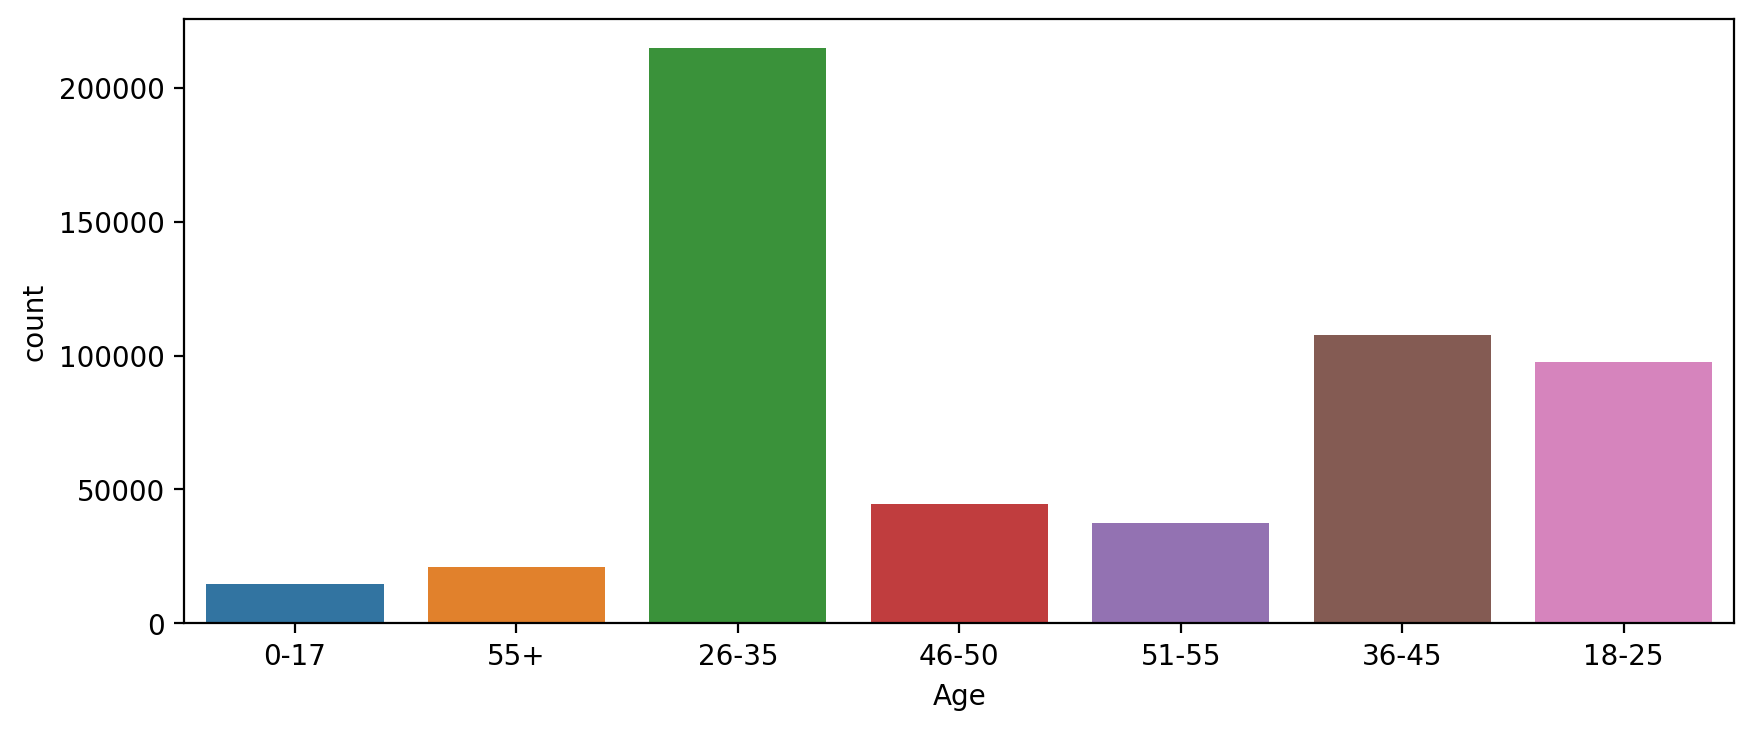

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='Age',data=df)

The Majority of users are from age group of 26-35

<AxesSubplot:xlabel='Age', ylabel='count'>

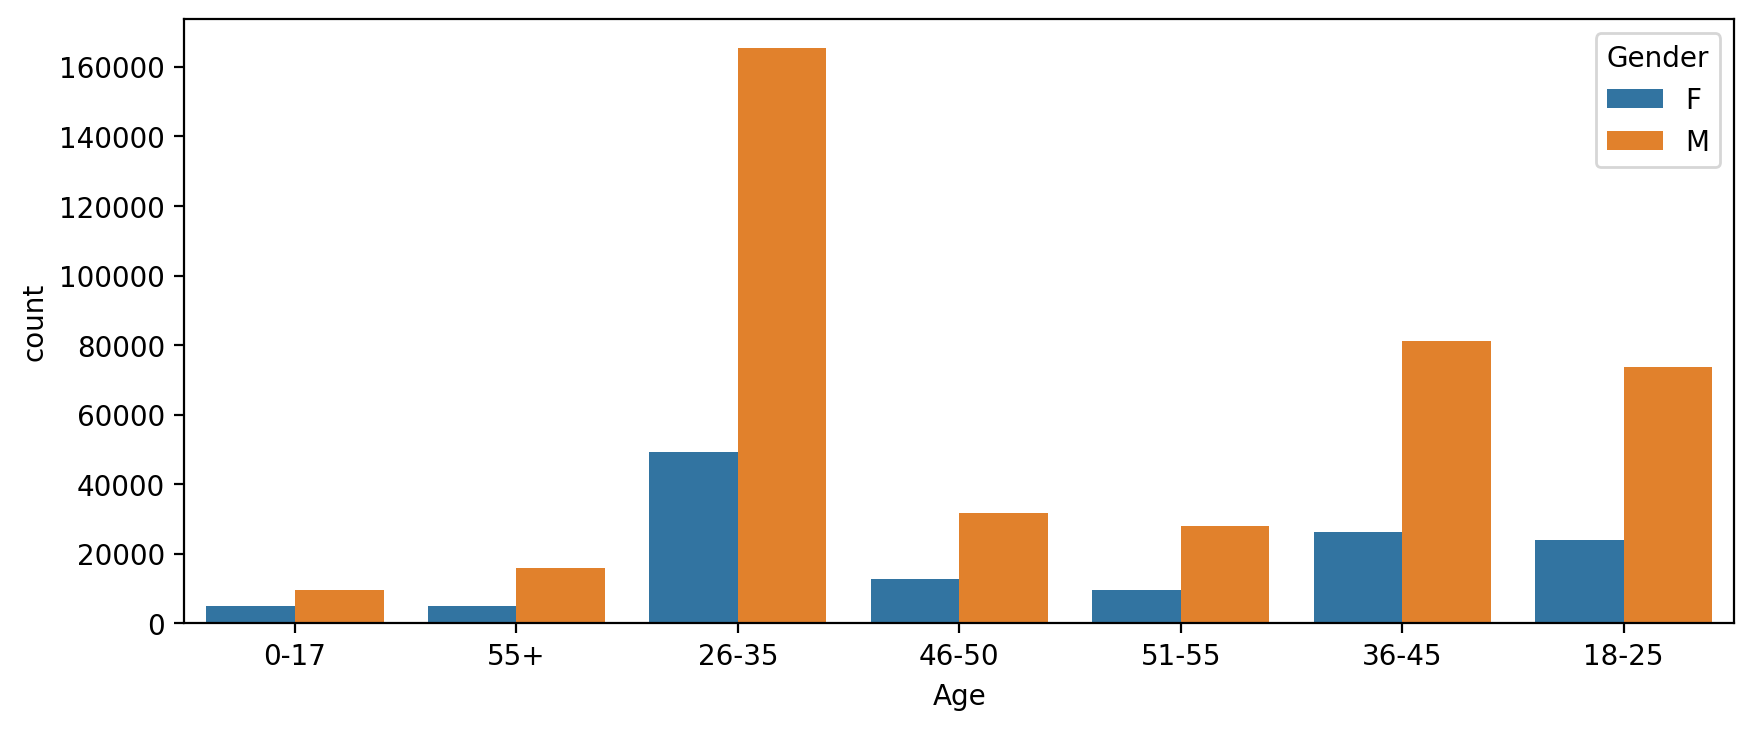

In [31]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='Age',data=df, hue = "Gender")

<AxesSubplot:xlabel='Age', ylabel='count'>

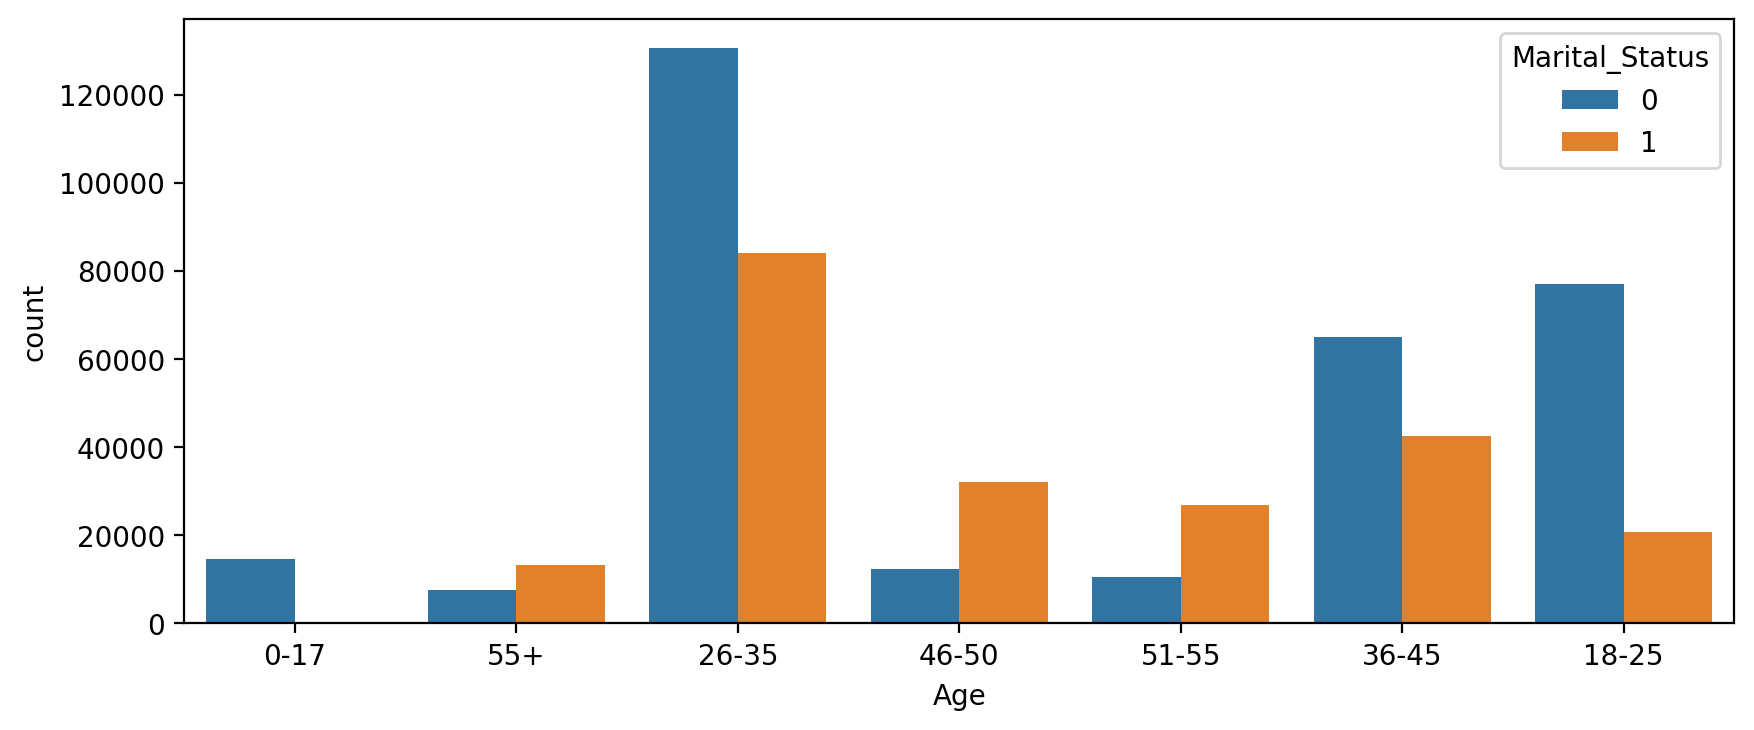

In [32]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='Age',data=df, hue = "Marital_Status")